In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_genkt.root")

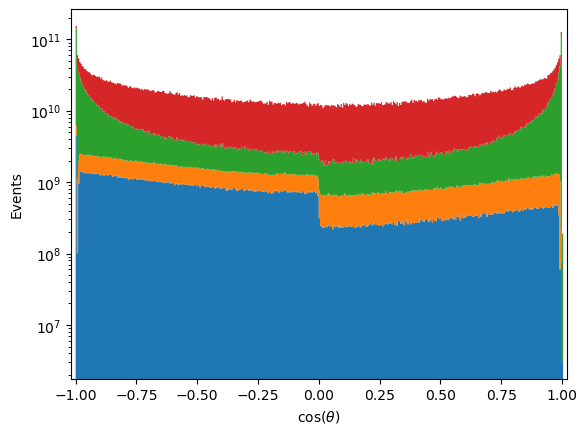

In [2]:
cos = genkt['wzp6_ee_qq_ecm91p2/cos_thetat;1'].to_hist()
mu_cos = genkt['wzp6_ee_mumu_ecm91p2/cos_thetat;1'].to_hist()
tau_cos = genkt['wzp6_ee_tautau_ecm91p2/cos_thetat;1'].to_hist()
gaga_cos = genkt['wzp6_gaga_qq_5_ecm91p2/cos_thetat;1'].to_hist()


hep.histplot([mu_cos,tau_cos, gaga_cos,cos], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.xlim(-1.02,1.02)
#plt.legend(loc = "upper center",prop={'size': 6})
plt.xlabel(r"cos($\theta$)")
plt.ylabel("Events")
plt.yscale("log")

Text(0.0, 1.0, 'FCC-ee simulation')

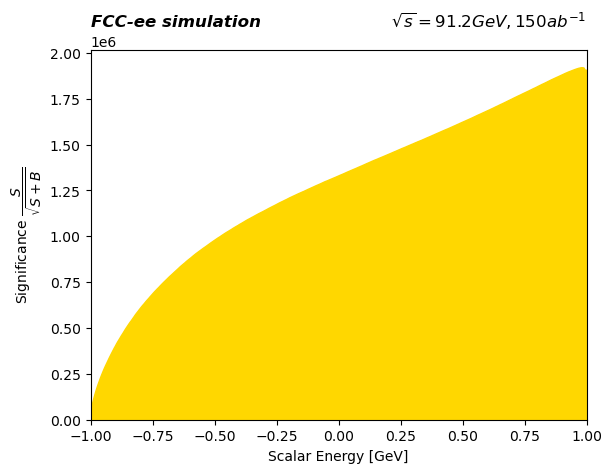

In [57]:
cos_y, cos_x = cos.to_numpy()
cos_ynew = []
cos_xn = abs(cos_x)

for i in range(1,len(cos_x)+1):
    s = cos[:i].sum()
    b = tau_cos[:i].sum()+mu_cos[:i].sum()+gaga_cos[:i].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        cos_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        cos_ynew.append(ratio)

plt.stackplot(cos_x,cos_ynew, color = "gold")
plt.xlim(-1,1)
plt.xlabel("Scalar Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [58]:
optmize = max(cos_ynew)
index = np.argmax(cos_ynew)
cut = cos_x[index]

print(optmize)
print(cut)

1918862.2111836416
0.98
